<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_1_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.287001,86.462913,69.165033,0.044486,198.959432,198.918405,0.041027
1,0.0,1.0,57.558742,88.014696,51.278318,-0.016917,206.834839,206.857754,-0.022914
2,0.0,2.0,39.606079,73.348759,80.209022,0.040947,203.204807,203.167940,0.036867
3,0.0,3.0,38.916159,24.730199,60.352173,-0.103317,133.895215,133.997709,-0.102494
4,0.0,4.0,37.092860,95.908215,20.677740,-0.015677,163.663138,163.680562,-0.017424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.177472,48.630768,71.114508,0.010335,174.933083,174.920629,0.012454
59996,999.0,56.0,31.634333,35.107405,58.884568,-0.075236,135.551069,135.615223,-0.064154
59997,999.0,57.0,62.721213,50.781429,69.133858,-0.065275,192.571225,192.631138,-0.059912
59998,999.0,58.0,38.903670,75.216790,49.298571,-0.020154,173.398877,173.417566,-0.018689


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.287001  86.462913  69.165033  ...  198.959432  198.918405  0.041027
      1.0    57.558742  88.014696  51.278318  ...  206.834839  206.857754 -0.022914
      2.0    39.606079  73.348759  80.209022  ...  203.204807  203.167940  0.036867
      3.0    38.916159  24.730199  60.352173  ...  133.895215  133.997709 -0.102494
      4.0    37.092860  95.908215  20.677740  ...  163.663138  163.680562 -0.017424
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.177472  48.630768  71.114508  ...  174.933083  174.920629  0.012454
      56.0   31.634333  35.107405  58.884568  ...  135.551069  135.615223 -0.064154
      57.0   62.721213  50.781429  69.133858  ...  192.571225  192.631138 -0.059912
      58.0   38.903670  75.216790  49.298571  ...  173.398877  173.417566 -0.018689
      59.0   33.440688  29.477379  33.840325  ...  106.723317  106.732350 -0.009033

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.287001  86.462913  69.165033  ...  198.959432  198.918405  0.041027
      1.0    57.558742  88.014696  51.278318  ...  206.834839  206.857754 -0.022914
      2.0    39.606079  73.348759  80.209022  ...  203.204807  203.167940  0.036867
      3.0    38.916159  24.730199  60.352173  ...  133.895215  133.997709 -0.102494
      4.0    37.092860  95.908215  20.677740  ...  163.663138  163.680562 -0.017424
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.177472  48.630768  71.114508  ...  174.933083  174.920629  0.012454
      56.0   31.634333  35.107405  58.884568  ...  135.551069  135.615223 -0.064154
      57.0   62.721213  50.781429  69.133858  ...  192.571225  192.631138 -0.059912
      58.0   38.903670  75.216790  49.298571  ...  173.398877  173.417566 -0.018689
      59.0   33.440688  29.477379  33.840325  ...  106.723317  106.732350 -0.009033

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.287001,86.462913,69.165033,0.044486,198.959432,198.918405,0.041027
1,0.0,1.0,57.558742,88.014696,51.278318,-0.016917,206.834839,206.857754,-0.022914
2,0.0,2.0,39.606079,73.348759,80.209022,0.040947,203.204807,203.167940,0.036867
3,0.0,3.0,38.916159,24.730199,60.352173,-0.103317,133.895215,133.997709,-0.102494
4,0.0,4.0,37.092860,95.908215,20.677740,-0.015677,163.663138,163.680562,-0.017424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.177472,48.630768,71.114508,0.010335,174.933083,174.920629,0.012454
59996,999.0,56.0,31.634333,35.107405,58.884568,-0.075236,135.551069,135.615223,-0.064154
59997,999.0,57.0,62.721213,50.781429,69.133858,-0.065275,192.571225,192.631138,-0.059912
59998,999.0,58.0,38.903670,75.216790,49.298571,-0.020154,173.398877,173.417566,-0.018689


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.287001  86.462913  69.165033  ...  198.959432  198.918405  0.041027
      1.0    57.558742  88.014696  51.278318  ...  206.834839  206.857754 -0.022914
      2.0    39.606079  73.348759  80.209022  ...  203.204807  203.167940  0.036867
      3.0    38.916159  24.730199  60.352173  ...  133.895215  133.997709 -0.102494
      4.0    37.092860  95.908215  20.677740  ...  163.663138  163.680562 -0.017424
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.177472  48.630768  71.114508  ...  174.933083  174.920629  0.012454
      56.0   31.634333  35.107405  58.884568  ...  135.551069  135.615223 -0.064154
      57.0   62.721213  50.781429  69.133858  ...  192.571225  192.631138 -0.059912
      58.0   38.903670  75.216790  49.298571  ...  173.398877  173.417566 -0.018689
      59.0   33.440688  29.477379  33.840325  ...  106.723317  106.732350 -0.009033

[60000 rows x 7 columns]

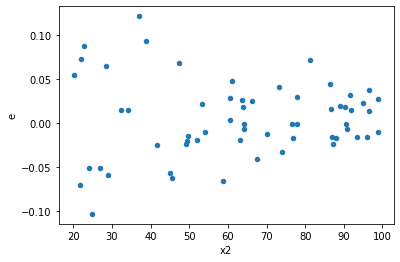

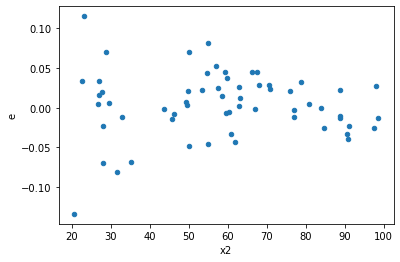

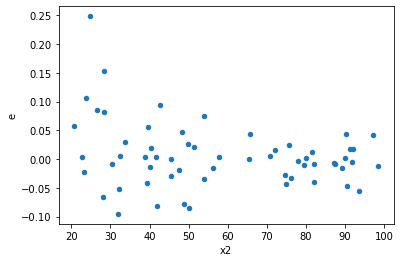

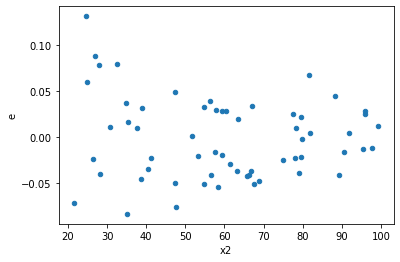

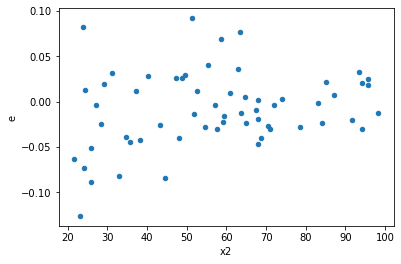

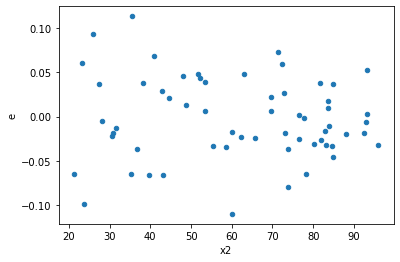

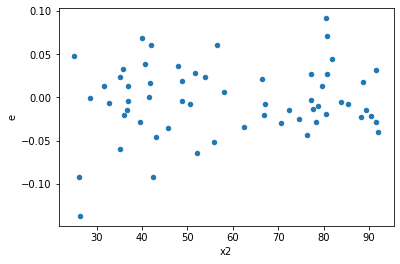

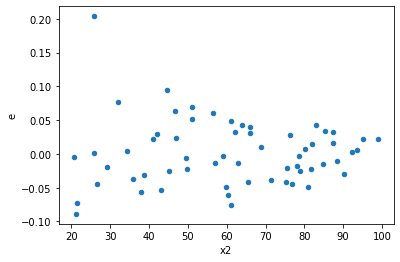

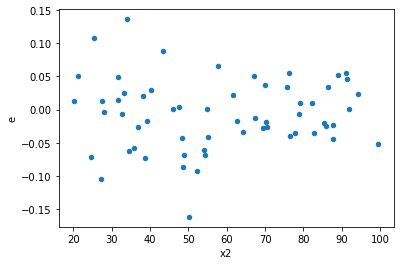

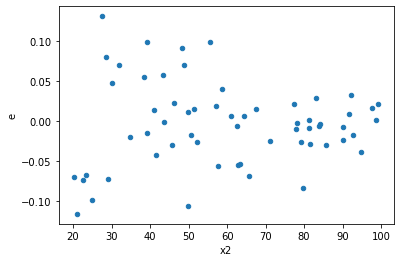

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,30.0,24.0,0.05175605975846006,0.049225578593578186,0.0017252019919486686,0.0020510657747324244,1.1888844229861355,0.6697506416478443,0.6651246791760779,0.33487532082392213,Reject001=1 : Homoscedasticity
1.0,23.0,31.0,0.03417282535283322,0.052706507358102776,0.0014857750153405747,0.001700209914777509,1.1443252829149109,0.7162245297361811,0.6418877351319094,0.35811226486809056,Reject001=1 : Homoscedasticity
3.0,25.0,29.0,0.024703042322570708,0.0622667837221621,0.0009881216929028282,0.0021471304731780034,2.172941337691239,0.04590295708232395,0.977048521458838,0.022951478541161974,Reject001=1 : Homoscedasticity
5.0,22.0,32.0,0.04659205607281461,0.07191383150298597,0.0021178207305824824,0.0022473072344683116,1.0611413903055975,0.8613384177926546,0.5693307911036727,0.4306692088963273,Reject001=1 : Homoscedasticity
11.0,29.0,25.0,0.05061958022292655,0.08139303687034136,0.001745502766307812,0.003255721474813654,1.8652055657868385,0.11727607474089696,0.9413619626295515,0.05863803737044848,Reject001=1 : Homoscedasticity
12.0,31.0,23.0,0.06285099116536631,0.04813752209725589,0.0020274513279150423,0.002092935743358952,1.0322988840926954,0.95093748003677,0.524531259981615,0.475468740018385,Reject001=1 : Homoscedasticity
13.0,33.0,21.0,0.033402838868394895,0.0759669045126043,0.001012207238436209,0.0036174716434573474,3.573844867031473,0.0032396524843023577,0.9983801737578488,0.0016198262421511789,Reject001=0 : Heteroscedasticity
15.0,32.0,22.0,0.058099482493264375,0.08049141347004075,0.0018156088279145117,0.0036587006122745795,2.0151370471563106,0.09008187133642287,0.9549590643317886,0.045040935668211435,Reject001=1 : Homoscedasticity
18.0,30.0,24.0,0.024437511365913916,0.07934751519294994,0.0008145837121971305,0.003306146466372914,4.058694541602645,0.000777369477065637,0.9996113152614672,0.0003886847385328185,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,30.0,24.0,0.05175605975846006,0.049225578593578186,0.0017252019919486686,0.0020510657747324244,1.1888844229861355,0.6697506416478443,Reject001=1 : Homoscedasticity
1.0,23.0,31.0,0.03417282535283322,0.052706507358102776,0.0014857750153405747,0.001700209914777509,1.1443252829149109,0.7162245297361811,Reject001=1 : Homoscedasticity
2.0,28.0,26.0,0.13833188159861073,0.028382721266606806,0.004940424342807526,0.0010916431256387234,0.22096140936314157,0.00017187375509510278,Reject001=0 : Heteroscedasticity
3.0,25.0,29.0,0.024703042322570708,0.0622667837221621,0.0009881216929028282,0.0021471304731780034,2.172941337691239,0.04590295708232395,Reject001=1 : Homoscedasticity
4.0,27.0,27.0,0.052391620246993356,0.030579025565567915,0.0019404303795182724,0.0011325565024284414,0.5836625288816637,0.16825316798361667,Reject001=1 : Homoscedasticity
5.0,22.0,32.0,0.04659205607281461,0.07191383150298597,0.0021178207305824824,0.0022473072344683116,1.0611413903055975,0.8613384177926546,Reject001=1 : Homoscedasticity
6.0,22.0,32.0,0.04280841601489484,0.04635632780745148,0.001945837091586129,0.0014486352439828589,0.7444792013919411,0.4751984848666691,Reject001=1 : Homoscedasticity
7.0,32.0,22.0,0.08237986236181993,0.0352633223113039,0.002574370698806873,0.00160287828687745,0.6226291682158773,0.21690727443324945,Reject001=1 : Homoscedasticity
8.0,22.0,32.0,0.0793443085740797,0.06269726991085948,0.0036065594806399866,0.001959289684714359,0.543257277533291,0.1388455032874514,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      716
Reject001=0 : Heteroscedasticity    284
Name: Result_test, dtype: int64